In [19]:
import numpy as np
import pandas as pd
import json
import os
import re

In [20]:
# get all json file path in the folder
folder_path = "../dataset/USA"

file_paths = []
for filename in os.listdir(folder_path):
    filepath = os.path.join(folder_path, filename)
    if os.path.isfile(filepath):
        file_paths.append(filepath)

len(file_paths)

47

## add file name

In [21]:
job_results_by_types = {}

for file_path in file_paths:
    match = re.search(r'/([^/]+)-\d+\.json$', file_path)
    if match:
        job_type = match.group(1)
        with open(file_path, 'r') as f:
            data = json.load(f)
        job_results_by_types[job_type] = job_results_by_types.get(job_type, []) + [data,]

print(job_results_by_types.keys())

dict_keys(['block-chain', 'data-scientist', 'natural-language-processing', 'reinforcement-learning', 'neural-networks', 'big-data-and-cloud-computing', 'data-analyst', 'machine-learning', 'time-series-analysis', 'deep-learning'])


In [22]:
salary_by_types = pd.DataFrame(columns=['type', 'salary', 'job_id', 'description'])
data = []

In [23]:
for job_type in job_results_by_types:
    datasets = job_results_by_types[job_type]

    for dataset in datasets:
        if 'jobs_results' not in dataset:
            continue 
        jobs_results = dataset["jobs_results"]
        for job_result in jobs_results:
            description = job_result["description"] 
            job_highlights = job_result["job_highlights"] 

            qualifications = None 
            responsibilities = None 
            benefits = None 

            for highlight in job_highlights:
                if highlight.get("title") == "Qualifications":
                    qualifications = highlight.get("items") 
                elif highlight.get("title") == "Responsibilities":
                    responsibilities = highlight.get("items")
                elif highlight.get("title") == 'Benefits':
                    benefits = highlight.get("items") 

            job_id = job_result["job_id"]
            salary_regex = r"\$([0-9,]+)"

            list_of_text = [description, qualifications, responsibilities, benefits]
            total_salary = 0
            num_salary = 0
            for text_item in list_of_text:
                if text_item is None:
                    continue 
                else:
                    if type(text_item) is list:
                        for text in text_item:
                            matches = re.findall(salary_regex, text)

                            if len(matches) == 0:
                                continue 
                            
                            for match in matches:
                                salary = float(match.replace(',', ''))
                                if salary < 100000:
                                    continue 
                                total_salary += salary
                                num_salary += 1
                    else:
                        matches = re.findall(salary_regex, text_item)

                        if len(matches) == 0:
                            continue
                        
                        for match in matches:
                            salary = float(match.replace(',', ''))
                            if salary < 100000:
                                continue 
                            total_salary += salary
                            num_salary += 1

            if num_salary != 0:
                avg_salary = total_salary / num_salary
                data.append({'type': job_type, "salary": avg_salary, 'job_id': job_id, 'description': description})


salary_by_types = salary_by_types.append(data, ignore_index=True)

/var/folders/h0/sq_brb3d0_lfvtk4fhlbrck00000gn/T/ipykernel_47150/1913384873.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  salary_by_types = salary_by_types.append(data, ignore_index=True)


In [24]:
salary_by_types.head()

,type,salary,job_id,description
0,block-chain,156000.0,eyJqb2JfdGl0bGUiOiJCbG9ja2NoYWluIFx1MDAyNiBEaW...,We are expanding Deloitte's Audit & Assurance ...
1,block-chain,180000.0,eyJqb2JfdGl0bGUiOiJCbG9ja2NoYWluIEVuZ2luZWVyIi...,We are seeking a highly motivated and skilled ...
2,block-chain,500000.0,eyJqb2JfdGl0bGUiOiJEZUZpIEJsb2NrY2hhaW4gQ28tRm...,Cryptops is currently looking for a Co-Founder...
3,block-chain,180000.0,eyJqb2JfdGl0bGUiOiJCbG9ja2NoYWluIEVuZ2luZWVyIi...,21.co is the world's leader in providing acces...
4,block-chain,150000.0,eyJqb2JfdGl0bGUiOiJCbG9ja2NoYWluIEVuZ2luZWVyIi...,Jump Crypto is committed to building and stand...


In [25]:
salary_by_types = salary_by_types.drop_duplicates(subset=['job_id', 'salary'])

In [26]:
salary_by_types.head(5)

,type,salary,job_id,description
0,block-chain,156000.0,eyJqb2JfdGl0bGUiOiJCbG9ja2NoYWluIFx1MDAyNiBEaW...,We are expanding Deloitte's Audit & Assurance ...
1,block-chain,180000.0,eyJqb2JfdGl0bGUiOiJCbG9ja2NoYWluIEVuZ2luZWVyIi...,We are seeking a highly motivated and skilled ...
2,block-chain,500000.0,eyJqb2JfdGl0bGUiOiJEZUZpIEJsb2NrY2hhaW4gQ28tRm...,Cryptops is currently looking for a Co-Founder...
3,block-chain,180000.0,eyJqb2JfdGl0bGUiOiJCbG9ja2NoYWluIEVuZ2luZWVyIi...,21.co is the world's leader in providing acces...
4,block-chain,150000.0,eyJqb2JfdGl0bGUiOiJCbG9ja2NoYWluIEVuZ2luZWVyIi...,Jump Crypto is committed to building and stand...


In [27]:
salary_by_types.shape

(111, 4)

In [28]:
salary_by_types.groupby("type")['salary'].mean()

type
big-data-and-cloud-computing    193785.714286
block-chain                     201554.363636
data-analyst                    123714.285714
data-scientist                  159147.500000
deep-learning                   193394.230769
machine-learning                198813.544974
natural-language-processing     193539.409091
neural-networks                 220583.333333
reinforcement-learning          190942.545918
Name: salary, dtype: float64

In [29]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "plotly_mimetype+notebook_connected"

In [30]:
import plotly.express as px

fig = px.box(salary_by_types, y="type", x="salary",
             title="Salary Range by Type of Data Science Position",
             color_discrete_sequence=["#ff0000", "#ff6600", "#ffcc00", "#f6d55c", "#ffe680"])

fig.update_layout(
    plot_bgcolor="#F8F8F8",  # change background color
    paper_bgcolor="#F8F8F8",  # change background color
    font=dict(
        size=12,  # change font size
    ),
    title=dict(
        font=dict(
            size=20,  # change font size
        )
    ),
    xaxis=dict(
        title="Salary ($USD)",  # change x-axis title
        titlefont=dict(
            size=14,  # change font size
        ),
    ),
    yaxis=dict(
        title="Type of Data Science Position",  # change y-axis title
        titlefont=dict(
            size=14,  # change font size
        ),
    ),
)
fig.show()


In [31]:
fig.write_html("../images/boxplot.html")

In [32]:
salary_on_ml = salary_by_types[(salary_by_types['type'] == 'deep-learning') | (salary_by_types['type'] == 'natural-language-processing') | (salary_by_types['type'] == 'neural-networks')| (salary_by_types['type'] == 'machine-learning')| (salary_by_types['type'] == 'reinforcement-learning')]
salary_on_ml

,type,salary,job_id,description
29,natural-language-processing,150000.0,eyJqb2JfdGl0bGUiOiJTZW5pb3IgQUkvTUwgT3BzIEVuZ2...,About the role\n\nWe are looking for a talente...
30,natural-language-processing,186000.0,eyJqb2JfdGl0bGUiOiJJU0UsIElucHV0IEV4cGVyaWVuY2...,"Summary\nPosted: Apr 13, 2023\n...\nRole Numbe..."
31,natural-language-processing,219000.0,eyJqb2JfdGl0bGUiOiJTZW5pb3IgTmF0dXJhbCBMYW5ndW...,Description\n\nLeidos has a career opening for...
32,natural-language-processing,186000.0,eyJqb2JfdGl0bGUiOiJJU0UsIElucHV0IEV4cGVyaWVuY2...,"Summary\nPosted: Apr 13, 2023\n...\nRole Numbe..."
33,natural-language-processing,136644.5,eyJqb2JfdGl0bGUiOiJSZXNlYXJjaCBBc3NvY2lhdGUgIG...,Research Associate in Natural Language Process...
...,...,...,...,...
106,deep-learning,157175.0,eyJqb2JfdGl0bGUiOiJBL0FJIE1hY2hpbmUgTGVhcm5pbm...,Description: The coolest jobs on this planet.....
107,deep-learning,250000.0,eyJqb2JfdGl0bGUiOiJBSSBTY2llbnRpc3QsIERlZXAgTG...,Absci is a generative AI drug creation company...
108,deep-learning,204000.0,eyJqb2JfdGl0bGUiOiJTdGFmZiBNYWNoaW5lIExlYXJuaW...,Eightfold.ai was founded with a vision to solv...
109,deep-learning,207125.0,eyJqb2JfdGl0bGUiOiJTb2x1dGlvbnMgQXJjaGl0ZWN0LC...,Do you want to be part of the team that brings...


## Clean

In [33]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
stop_words = set(stopwords.words("english"))

In [34]:
import re
import string
def clean(text):
 text1 = re.sub(r'#\w+ ?', "", str(text)) #Removes hashtags
 text1 = re.sub(r'@\w+ ?',"",text1) #Removes usernames
 text1 = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", text1) #Removes links
 text1 = re.sub('[0-9]+', "", text1) #Removes numbers
 text1 = " ".join(text1.split())
 text1 = "".join([char for char in text1 if char not in string.punctuation]) #Removes punctuations
 text1 = text1.replace('\n',"") #Removes escape sequences
 return text1

salary_on_ml['description_clean'] = salary_on_ml['description'].apply(lambda x:clean(x))

/var/folders/h0/sq_brb3d0_lfvtk4fhlbrck00000gn/T/ipykernel_47150/3596373963.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
def Clean_Words(text):
 text1 = re.split('\W+', text) #Tokenization
 text1 = [word for word in text1 if word not in stop_words] #removing stop words
 #text1 = [PorterStemmer().stem(word) for word in text1]#removing suffixes
 text1 = [WordNetLemmatizer().lemmatize(word) for word in text1]#Lemmatization
 return text1

salary_on_ml['description_clean'] = salary_on_ml['description_clean'].apply(lambda x:Clean_Words(x))

salary_on_ml.head()

/var/folders/h0/sq_brb3d0_lfvtk4fhlbrck00000gn/T/ipykernel_47150/1791135948.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,type,salary,job_id,description,description_clean
29,natural-language-processing,150000.0,eyJqb2JfdGl0bGUiOiJTZW5pb3IgQUkvTUwgT3BzIEVuZ2...,About the role\n\nWe are looking for a talente...,"[About, role, We, looking, talented, AIML, Ops..."
30,natural-language-processing,186000.0,eyJqb2JfdGl0bGUiOiJJU0UsIElucHV0IEV4cGVyaWVuY2...,"Summary\nPosted: Apr 13, 2023\n...\nRole Numbe...","[Summary, Posted, Apr, Role, Number, Are, inte..."
31,natural-language-processing,219000.0,eyJqb2JfdGl0bGUiOiJTZW5pb3IgTmF0dXJhbCBMYW5ndW...,Description\n\nLeidos has a career opening for...,"[Description, Leidos, career, opening, Senior,..."
32,natural-language-processing,186000.0,eyJqb2JfdGl0bGUiOiJJU0UsIElucHV0IEV4cGVyaWVuY2...,"Summary\nPosted: Apr 13, 2023\n...\nRole Numbe...","[Summary, Posted, Apr, Role, Number, Are, inte..."
33,natural-language-processing,136644.5,eyJqb2JfdGl0bGUiOiJSZXNlYXJjaCBBc3NvY2lhdGUgIG...,Research Associate in Natural Language Process...,"[Research, Associate, Natural, Language, Proce..."


In [36]:
def clean(text):
 text1 = re.sub(r'#\w+ ?', "", str(text)) #Removes hashtags
 text1 = re.sub(r'@\w+ ?',"",text1) #Removes usernames
 text1 = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", text1) #Removes links
 text1 = re.sub('[0-9]+', "", text1) #Removes numbers
 text1 = " ".join(text1.split())
 text1 = "".join([char for char in text1 if char not in string.punctuation]) #Removes punctuations
 text1 = text1.replace('\n',"") #Removes escape sequences
 return text1

salary_on_ml['description_clean'] = salary_on_ml['description_clean'].apply(lambda x:clean(x))
salary_on_ml.head()

/var/folders/h0/sq_brb3d0_lfvtk4fhlbrck00000gn/T/ipykernel_47150/1241240252.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,type,salary,job_id,description,description_clean
29,natural-language-processing,150000.0,eyJqb2JfdGl0bGUiOiJTZW5pb3IgQUkvTUwgT3BzIEVuZ2...,About the role\n\nWe are looking for a talente...,About role We looking talented AIML Ops engine...
30,natural-language-processing,186000.0,eyJqb2JfdGl0bGUiOiJJU0UsIElucHV0IEV4cGVyaWVuY2...,"Summary\nPosted: Apr 13, 2023\n...\nRole Numbe...",Summary Posted Apr Role Number Are interested ...
31,natural-language-processing,219000.0,eyJqb2JfdGl0bGUiOiJTZW5pb3IgTmF0dXJhbCBMYW5ndW...,Description\n\nLeidos has a career opening for...,Description Leidos career opening Senior Natur...
32,natural-language-processing,186000.0,eyJqb2JfdGl0bGUiOiJJU0UsIElucHV0IEV4cGVyaWVuY2...,"Summary\nPosted: Apr 13, 2023\n...\nRole Numbe...",Summary Posted Apr Role Number Are interested ...
33,natural-language-processing,136644.5,eyJqb2JfdGl0bGUiOiJSZXNlYXJjaCBBc3NvY2lhdGUgIG...,Research Associate in Natural Language Process...,Research Associate Natural Language Processing...


In [37]:
salary_on_ml.fillna('NA', inplace=True)
salary_on_ml = salary_on_ml.dropna(subset=['description_clean'])
salary_on_ml = salary_on_ml[salary_on_ml['description_clean'] != 'nan']

/var/folders/h0/sq_brb3d0_lfvtk4fhlbrck00000gn/T/ipykernel_47150/1205307167.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



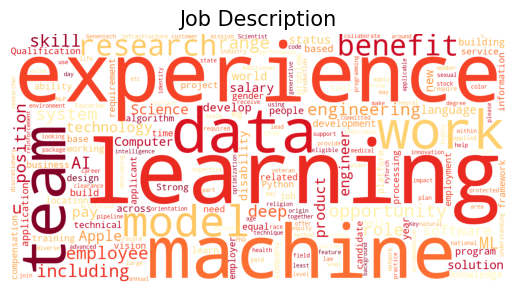

In [38]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

plt.style.use('fast')
description_clean = " ".join(text for text in salary_on_ml['description_clean'])
wc = WordCloud(width = 1200, height = 600,background_color='white', colormap='YlOrRd', collocations=False).generate(description_clean)
plt.title('Job Description', fontsize=15)
plt.imshow(wc)

plt.axis('off')

plt.savefig('../images/wordcloud.png', dpi=300)
plt.show()


In [39]:
from collections import Counter

plt.style.use('fast')

# Generate word frequencies
word_counts = Counter(description_clean.split())
top_words = word_counts.most_common(40)
top_words

[('learning', 375),
 ('team', 263),
 ('experience', 263),
 ('machine', 249),
 ('Experience', 220),
 ('work', 218),
 ('data', 217),
 ('We', 215),
 ('Learning', 187),
 ('model', 186),
 ('The', 164),
 ('including', 152),
 ('Machine', 143),
 ('opportunity', 142),
 ('range', 142),
 ('skill', 135),
 ('AI', 133),
 ('ML', 131),
 ('system', 129),
 ('employee', 126),
 ('benefit', 124),
 ('research', 121),
 ('role', 120),
 ('You', 120),
 ('technology', 118),
 ('Apple', 118),
 ('position', 116),
 ('product', 114),
 ('status', 99),
 ('world', 99),
 ('deep', 98),
 ('software', 95),
 ('This', 94),
 ('salary', 93),
 ('u', 92),
 ('problem', 90),
 ('solution', 89),
 ('new', 88),
 ('engineering', 88),
 ('building', 84)]